![(book cover)](https://covers.oreillystatic.com/images/0636920167433/cat.gif "(book cover)")
### **Programming Quantum Computers** by O'Reilly Media -  [**book Info**](http://shop.oreilly.com/product/0636920167433.do)  - [**all code samples**](https://oreilly-qc.github.io)

#### **Code samples for Chapter 3**
These code samples were written by Eric Johnston, Nic Harrigan, and Mercedes Gimeno-Segovia.

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
%matplotlib inline

[0.5+0.j 0. +0.j 0.5+0.j 0. +0.j 0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]


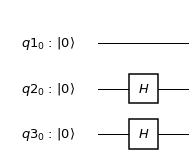

In [18]:
## Example 3-1: Seperable Qubits
# Set up the program
qubit1 = QuantumRegister(1, name='q1')
qubit2 = QuantumRegister(1, name='q2')
qubit3 = QuantumRegister(1, name='q3')
qc = QuantumCircuit(qubit1, qubit2, qubit3)

qc.h(qubit2)              # put it into a superposition of 0 and 1
qc.h(qubit3)              # put it into a superposition of 0 and 1

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit

counts: {'0 0': 1}
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


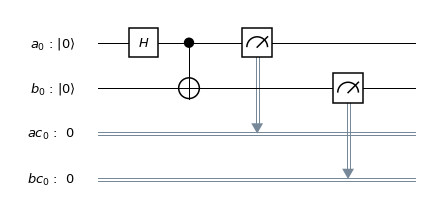

In [19]:
## Example 3-2: Entangled Qubits
# Set up the program
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')
a_c = ClassicalRegister(1, name='ac')
b_c = ClassicalRegister(1, name='bc')
qc = QuantumCircuit(a, b, a_c, b_c)

qc.h(a)              # put a into a superposition of 0 and 1
qc.cx(a, b)        # entangle a and b
qc.measure(a, a_c)
qc.measure(b, b_c)

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

counts = result.get_counts(qc)
print('counts:',counts)

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


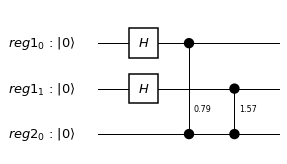

In [20]:
## Example 3-3: Phase Kickback
# Set up the program
reg1 = QuantumRegister(2, name='reg1')
reg2 = QuantumRegister(1, name='reg2')
qc = QuantumCircuit(reg1, reg2)

qc.h(reg1)         # put a into reg1 superposition of 0,1,2,3
qc.cu1(math.pi/4, reg1[0], reg2)
qc.cu1(math.pi/2, reg1[1], reg2)

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit

counts: {'1': 1}
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]


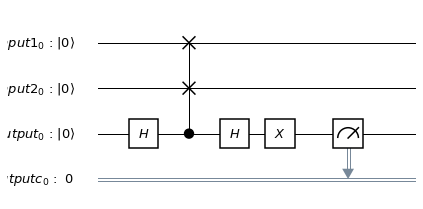

In [21]:
## Example 3-4: Swap Test
# Set up the program
input1 = QuantumRegister(1, name='input1')
input2 = QuantumRegister(1, name='input2')
output = QuantumRegister(1, name='output')
output_c = ClassicalRegister(1, name='outputc')
qc = QuantumCircuit(input1, input2, output, output_c)

qc.h(output)
qc.cswap(output, input1, input2)
qc.h(output)
qc.x(output)
qc.measure(output, output_c)

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

counts = result.get_counts(qc)
print('counts:',counts)

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit

[0.5+0.j  0. -0.5j 0.5+0.j  0. +0.5j]


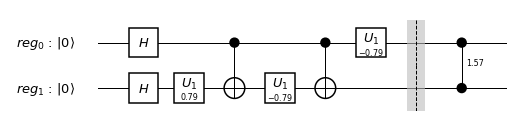

In [22]:
# Example 3-5: Custom conditional-phase
# Set up the program
reg = QuantumRegister(2, name='reg')
qc = QuantumCircuit(reg)

theta = math.pi / 2
qc.h(reg)
qc.u1(theta/2, reg[1])
qc.cx(reg[0], reg[1])
qc.u1(-theta/2, reg[1])
qc.cx(reg[0], reg[1])
qc.u1(-theta/2, reg[0])

qc.barrier()

qc.cu1(theta, reg[0], reg[1])

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit

counts: {'0 0': 1}
[0.924+0.383j 0.   +0.j    0.   +0.j    0.   +0.j   ]


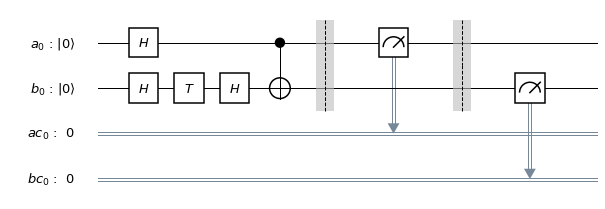

In [23]:
# Example 3-6: Remote Randomness
# Set up the program
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')
a_c = ClassicalRegister(1, name='ac')
b_c = ClassicalRegister(1, name='bc')
qc = QuantumCircuit(a, b, a_c, b_c)

qc.h(a)
## now prob of a is 50%
qc.h(b)
qc.t(b)
qc.h(b)
## now prob of b is 15%
qc.cx(a, b)        # entangle a and b
## Now, you can read *either*
## qubit and get 50% prob.
## If the result is 0, then
## the prob of the *remaining*
## qubit is 15%, else it's 85%
qc.barrier()
qc.measure(a, a_c)
qc.barrier()
qc.measure(b, b_c)

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

counts = result.get_counts(qc)
print('counts:',counts)

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit